In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from  datascience import *

from scipy import stats 
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Question 1: (Theoretical question)

In the case of simple linear regression of Y onto X, the $R^2$ statistic is equal to $r^2$ = the square of the correlation between Y and X (p = 1). Prove that this is the case. 
Hint: use  the regression coefficients,  
$$ \widehat\beta_0 = \overline{y} - \widehat\beta_1 \overline{x} $$ 
and $$ \widehat\beta_1  = rS_y/S_x $$
For simplicity, you may assume that $\overline{x}$ = $\overline{y}$  = 0.

- r (corrilation coefficient) tells us how closely related x and y are. the closer r is to negative 1 or positive 1 suggests that x and y are more closely related. the $R^2$ statistic is just the correlation coefficient squared. so if we set these equal to each other $R^2 = r$ then the only value that would satisfy this equation is 1 , suggesting that x and y are related perfectly ,reenforecing the first equation. 
    $$ \widehat\beta_0 = \overline{y} - \widehat\beta_1 \overline{x} $$ 
    and if there is no coefficent then the standard deviation of y divided by the standard deviation of x multiplied by one would infact be the $\hat\beta_1$

## Question 2: (Theoretical question)

Using basic statistical properties of the variance, as well as single variable calculus, prove that $\alpha$ given by 
$$  \alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}   $$
does indeed minimize Var($\alpha$X + (1 − $\alpha$)Y ), where $\sigma^2_X$, $\sigma^2_Y$ are the variance of $X$ and $Y$ respectively and $\sigma_{XY}$ is the covariance between $X$ and $Y$.

-  if we are trying to prove that the $\alpha$ given by the first equation minnimizes Var($\alpha$X + (1 − $\alpha$)Y ) that the equation. we can take a partial derivative of Var($\alpha$X + (1 − $\alpha$)Y ) with respect to $\alpha$ this partial derivative is equal to $2*\alpha * \sigma^2_x - 2*\sigma^2_y + 2 *\alpha *\sigma^2_y + 2\sigma_{xy} - 4*\alpha*\sigma_{xy}$ this equation itself can be solved for $\alpha$ but in order to prove that we have minimized Var we need to take the second partial derivative with respect to alpha wich is equivalent to $2*\sigma^2_x + 2\sigma^2_y - 4\sigma_{xy}$ which is indeed greater than 0

## Question 3: (Programming question)

This question involves the use of multiple linear regression on the `Auto` data set. 

1. Read the data `Auto.csv`. Convert it into an numpy array. Extract `mpg` as the response and all other variables as predictors except `cylinders`, `name` and `origin` as the predictors.

In [2]:
#Read the csv file
Auto = pd.read_csv('Auto.csv', na_values='?').dropna()
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
# Write the code to extract the response and the predictors. 
reg = smf.ols('mpg ~ displacement + horsepower + weight + acceleration + year', Auto).fit()
reg

2. Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the entire data as the training data. Find the $R^2$ using the `.score()` method.

In [85]:
y = Auto['mpg']
X = Auto[['displacement','horsepower','weight','acceleration','year']]



In [86]:
model = LinearRegression(fit_intercept= True)
model.fit(X,y)

LinearRegression()

In [87]:

Rsquare = model.score(X,y)
print(Rsquare)

0.8087665240097104


- you can see that from smf and by using sklearn we get a very simular r squared value

3. In order to calculate pvalue for the Linear regression, you need to use `import statsmodels.formula.api as smf` to get pvalues corresponds to each predictors. Use `smf.ols()` function to fit the linear regression and `.summary()` method to print the results. Details are in the lab. An intercept is not included by default here and should be added by the user.

3i. Is there a relationship between the predictors and the response, `mpg`?

Ans: Yes, Rsquare is also high and pvalue corresponding to weight and year is highly significant. 

3ii. Which predictors appear to have a statistically significant relationship to the response?
Ans: `Year` and `weights`

3iii. What does the coefficient for the year variable suggest?
Ans: `Year` is a highly significant predictor for `mpg`.

In [88]:
# Follow the Labs to use the correct function to 
import statsmodels.formula.api as smf
model = smf.ols('mpg ~ displacement + horsepower + weight + acceleration + year', Auto).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     326.5
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.26e-136
Time:                        21:34:35   Log-Likelihood:                -1037.0
No. Observations:                 392   AIC:                             2086.
Df Residuals:                     386   BIC:                             2110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.4353      4.677     -3.300      0.001     -24.631      -6.240
displacement     0.0028      0.005      0.509      0.611      -0.008       0.014
horsepower       0.0010      0.014      0.074      0.941      -0.026       0.028
weight          -0.0069      0.001    -10.333      0.000      -0.008      -0.006
acceleration     0.0903      0.102      0.886      0.376      -0.110       0.291
year             0.7541      0.053     14.334      0.000       0.651       0.858
==============================================================================
Omnibus:                       37.089   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.937
Skew:                           0.626   Prob(JB):                     2.63e-13
Kurtosis:                       4.407   Cond. No.                     8.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Draw the residual plot and comment on any problems you see with the fit. 

Ans: Problem of nonlinearity and Problem of heteroscedasticity

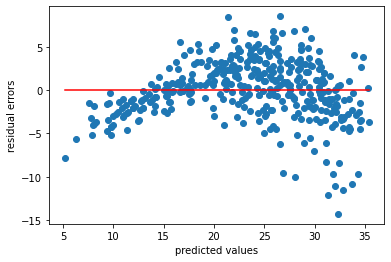

In [89]:

y_pred = model.predict(X)
residuals = y_pred - y
plt.scatter(y_pred,residuals)
plt.plot([min(y_pred),max(y_pred)],[0,0],color="red")
plt.xlabel("predicted values")
plt.ylabel("residual errors")
plt.show()

## Question 4: Programming Questions

This problem focuses on the collinearity problem. (a) Perform the following commands to generate the simulated data from the linear model.

In [95]:
np.random.seed(1)
n  = 100 
x1 = np.random.uniform(0,1, size=n)
x2 = 0.5*x1 + 0.1*np.random.normal(size=n)
y  = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=n)

1. What is the true $\beta_0$, $\beta_1$, and $\beta_2$ for the linear model above. 


In [98]:
## Write the code
x = np.vstack((x1,x2)).T
model = LinearRegression(fit_intercept= True)
model.fit(x,y)
y_pred = model.predict(x)
err = y_pred - y
model.intercept_,model.coef_

(2.1892843976248217, array([0.70462854, 2.50240496]))

2. What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

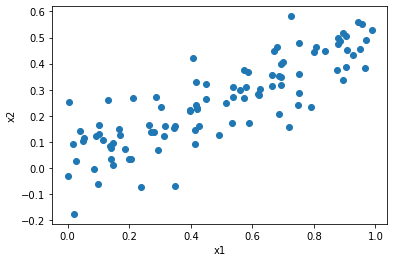

In [99]:
plt.scatter(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

- there seams to be a linear relationship between x1 and x2

3. Using this data, fit a least squares regression to predict y using x1 and x2.  Find the estimates of $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis at 5% level of significance ? $$ H_0 : \beta_1 = 0 $$ 
How about the null hypothesis $$ H_0 : \beta_2 = 0  ?$$ 


In [114]:
x2.shape

(100,)

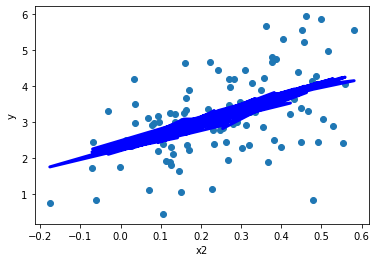

In [115]:
plt.scatter(x2,y)
plt.plot(x2, y_pred, color = 'blue', linewidth = 3)
plt.xlabel("x2")
plt.ylabel("y")
plt.show()


- looking at the plot alone is not enough to accept or reject the null hypothesis

In [116]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
reg = smf.ols('y ~ x1 + x2', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           4.40e-07
Time:                        22:19:31   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Comment what kind of Error (type 1 or type 2) do you commit at 5% level and 1% level in the test 
$$ H_0 : \beta_1 = 0 $$  and $$ H_0 : \beta_2 = 0 $$
Also recall that Power = 1 - Type 2 Error. If the Type II Error increases what will happen to the power? 



- reguardless of the level of significance we can conclude that $\beta_1$ is equal to 0, at a .05 level of significance we can conclude that $\beta_2$ is not zero but conversly at a .01 level of significance we could make a type I error but not rejecting the null hypothesis even though is it quite close  

5. Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $$ H_0 : \beta_1  =0 ? $$ 


In [117]:
df = pd.DataFrame({'x1': x1, 'y': y})
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.68e-07
Time:                        22:26:25   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- according to the summary command , even though the $R^2$ value is quite low the p value for the model and the individual coefficeint is ) meaning we cannot accept the null hypothesis

6. Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis $$ H_0 : \beta_1  =0 ? $$ 
Do the results obtained in (3)–(5) contradict each other? Explain your answer.



In [120]:
df = pd.DataFrame({'x2': x2, 'y': y})
reg = smf.ols('y ~ x2', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.09e-07
Time:                        22:29:52   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- results here are actually quite similar , where the $R^2$ value is low but the p value for the model and coefficient is 0(reject the null hypothesis). this should be expected and does not conflict with previous answers . this is due to the fact that we are only using 1 variable to predict a response

7. Now suppose we obtain one additional observation, which was unfortunately mismeasured. Run the following code.

In [121]:
np.random.seed(1)
n  = 100 
x1 = np.random.uniform(0,1, size=n)
x2 = 0.5*x1 + 0.1*np.random.normal(size=n)
y  = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=n)

x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y  = np.append(y,6)
X  = np.column_stack((x1,x2))

Refit the linear model `y` on `X` using this new data. is this observation an outlier? A high-leverage point? Both? 
Plot the residual plot and plot the new additional point and its correspondent residual. Explain your answers.
 

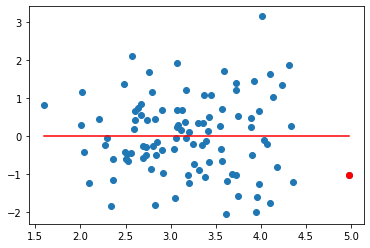

In [122]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
residuals = y_pred - y
# Plot the residual scatter plot
plt.scatter(y_pred, residuals)
plt.plot([np.min(y_pred), np.max(y_pred)],[0,0], color = "red")
#plot the new additional observation and its correspondent residual
plt.scatter(y_pred[100], residuals[100], color = "red")

-  here the new point is an outlier since its an unusually high response , this means it wont influence the model very much at all